### Import and Download Libraries


In [54]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Download NLTK resources
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('punkt_tab')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [55]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Load and Analyze Data

In [56]:
train_path = '/content/drive/MyDrive/youtube_spam_detector/train.csv'
test_path = '/content/drive/MyDrive/youtube_spam_detector/test.csv'

test_data = pd.read_csv(test_path)
test_data.head()

,COMMENT_ID,AUTHOR,DATE,CONTENT,VIDEO_NAME
0,1370,tyler sleetway,2013-10-05 00:57:25.078,so beutiful,Shakira - Waka Waka
1,1371,Young Hittaz,2014-01-19 04:21:11,everyone please come check our newest song in ...,PSY - GANGNAM STYLE(?????) M/V
2,1372,WeMuckAround,2014-08-16 20:59:28,katy perry will u sit on my face please. it wo...,Katy Perry - Roar
3,1373,DanteBTV,NaN,Check Out The New Hot Video By Dante B Called ...,Eminem - Love The Way You Lie ft. Rihanna
4,1374,Sheila Cenabre,2014-08-19 12:33:11,I really love this video.. http://www.bubblews...,Katy Perry - Roar


In [57]:
train_data = pd.read_csv(train_path)
train_data.head()

,COMMENT_ID,AUTHOR,DATE,CONTENT,VIDEO_NAME,CLASS
0,1,Brandon Pryor,2014-01-19 00:36:25,I dont even watch it anymore i just come here ...,PSY - GANGNAM STYLE(?????) M/V,0
1,2,Chelsea Yun,2015-05-23 07:17:09.691,i hate rap﻿,Eminem - Love The Way You Lie ft. Rihanna,0
2,3,Sofia Aristizabal,2014-09-09 00:43:52,"I loved, she is amazing.. OMG your eyes*_*﻿",Katy Perry - Roar,0
3,4,said abdesalam,2015-05-24 07:35:13.754,song is bad﻿,Eminem - Love The Way You Lie ft. Rihanna,0
4,5,crazy girl,2015-05-23 23:26:05.305,tension⤴︎⤴︎﻿,"LMFAO - Party Rock Anthem ft. Lauren Bennett, ...",0


In [58]:
train_data.isnull().sum()

,0
COMMENT_ID,0
AUTHOR,0
DATE,170
CONTENT,0
VIDEO_NAME,0
CLASS,0


In [59]:
train_data['DATE'] = train_data['DATE'].fillna('Unknown')
test_data['DATE'] = test_data['DATE'].fillna('Unknown')

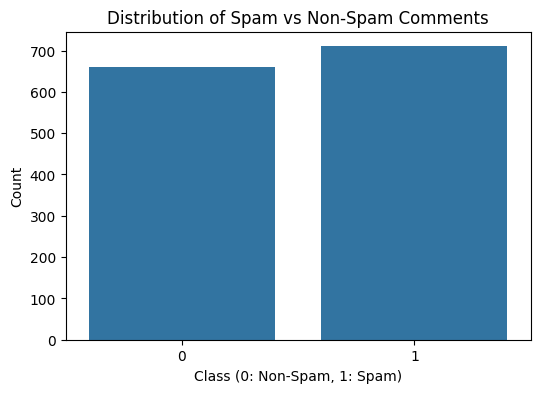

In [60]:
plt.figure(figsize=(6,4))
sns.countplot(x = 'CLASS', data = train_data)
plt.title('Distribution of Spam vs Non-Spam Comments')
plt.xlabel('Class (0: Non-Spam, 1: Spam)')
plt.ylabel('Count')
plt.show()

### NLP Preprocessing

In [70]:
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    tokens = nltk.word_tokenize(text.lower())
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word.isalnum() and word not in stop_words]
    return ' '.join(tokens)

train_data['CONTENT'] = train_data['CONTENT'].apply(preprocess_text)
test_data['CONTENT'] = test_data['CONTENT'].apply(preprocess_text)

vectorizer = CountVectorizer(max_features=100000)

### Model Fitting, Training, and Evaluation


In [71]:
X_train = vectorizer.fit_transform(train_data['CONTENT']).toarray()
X_test = vectorizer.transform(test_data['CONTENT']).toarray()
y_train = train_data['CLASS']

rf_model = RandomForestClassifier(
    n_estimators=100,
    max_depth=None,
    random_state=42
)

rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [72]:
## Evaluate model with cross-validation (Pruning)
cv_scores = cross_val_score(rf_model, X_train, y_train, cv=5, scoring='accuracy')

y_train_pred = rf_model.predict(X_train)
y_test_pred = rf_model.predict(X_test)

print(cv_scores)

[0.94525547 0.90875912 0.95620438 0.95255474 0.93772894]


### Save Data

In [73]:
test_data['CLASS'] = y_test_pred
submission_file_rf = "submission_rf1.csv"
test_data[['COMMENT_ID', 'CLASS']].to_csv(submission_file_rf, index=False)